In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Relating Variables with scatter plots

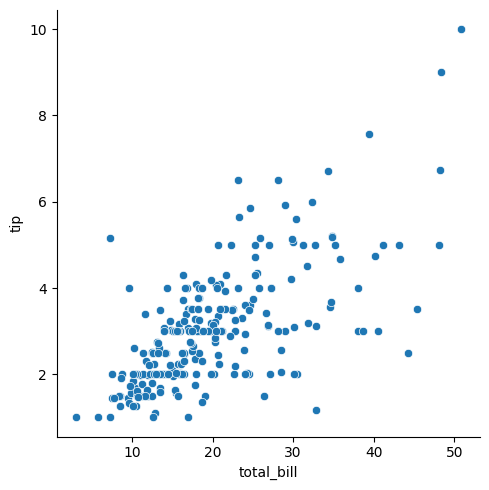

In [36]:
sns.relplot(data=tips,x='total_bill',y="tip")

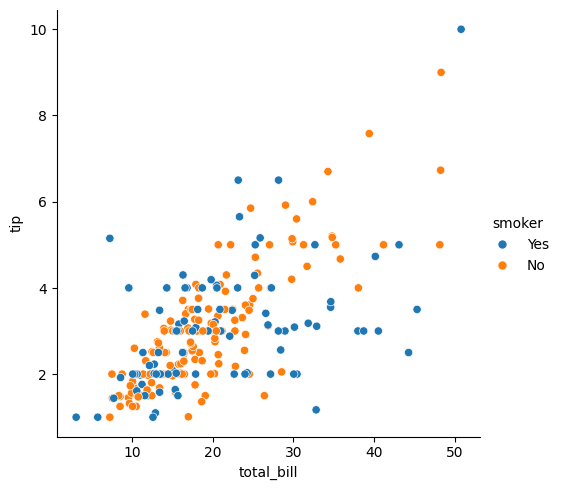

In [37]:
sns.relplot(data=tips,x='total_bill',y="tip",hue='smoker')
#hue = 'hue' is used to visualize the data of different categories in one plot.

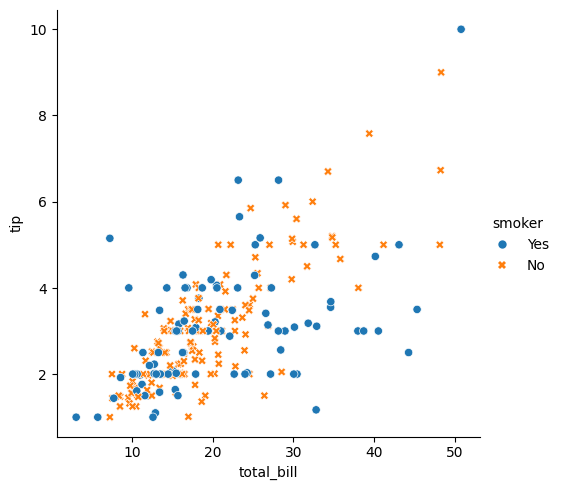

In [38]:
sns.relplot(data=tips,
            x='total_bill',y="tip",hue='smoker',style='smoker')

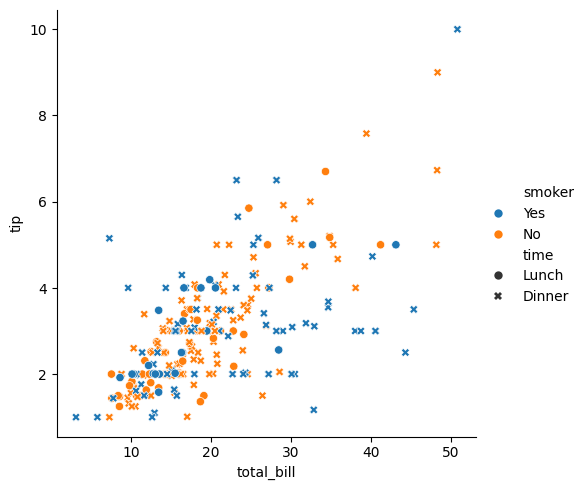

In [39]:
sns.relplot(data=tips,
            x='total_bill',y="tip",hue='smoker',style='time')

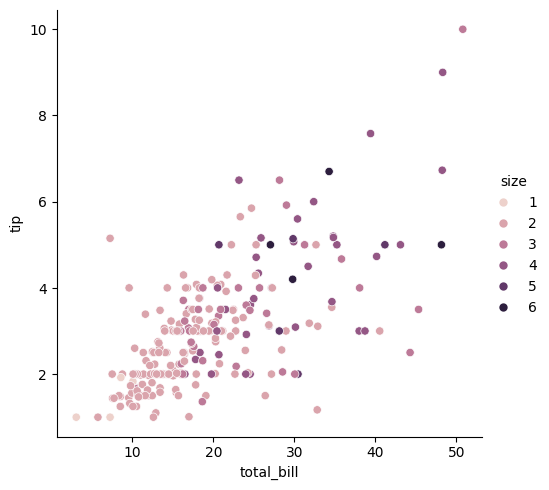

In [40]:
sns.relplot(data=tips,
            x='total_bill',y="tip",hue='size')

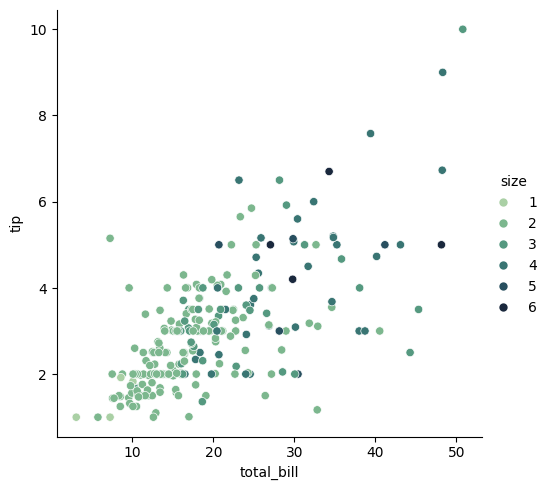

In [41]:
sns.relplot(data=tips,
            x="total_bill",y="tip",
            hue="size",palette="ch:r=-.5,l=.75")
#'palette' is used to change the colour of the plot.

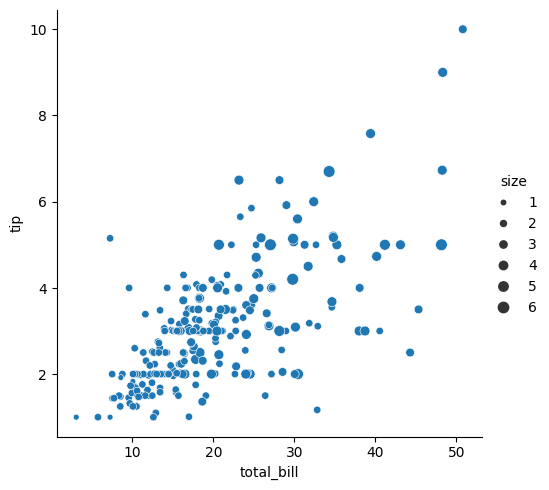

In [42]:
sns.relplot(data=tips,x="total_bill",y="tip",size="size")

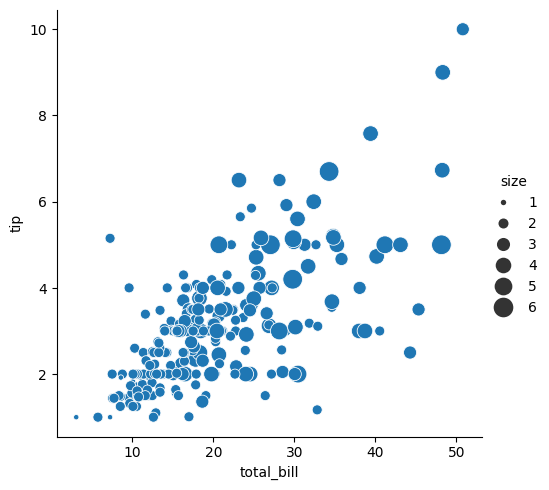

In [43]:
sns.relplot(data=tips,
            x="total_bill",y="tip",
            size="size",sizes=(15,200))

Emphasizing continuity with line plots

In [44]:
dowjones=sns.load_dataset('dowjones')
dowjones

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45
...,...,...
644,1968-08-01,883.72
645,1968-09-01,922.80
646,1968-10-01,955.47
647,1968-11-01,964.12


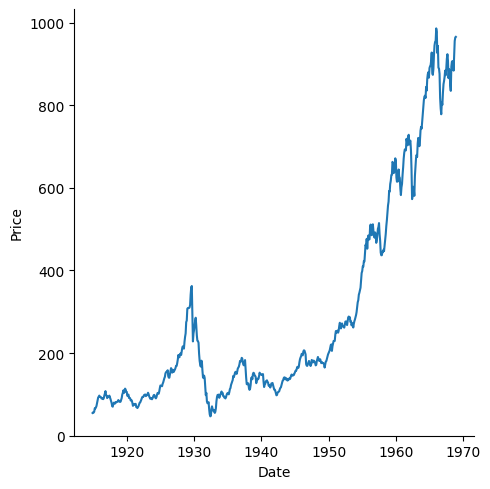

In [45]:
sns.relplot(data=dowjones,x="Date",y="Price",kind="line")

Aggregation and representing uncertainty

In [46]:
fmri=sns.load_dataset('fmri')
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


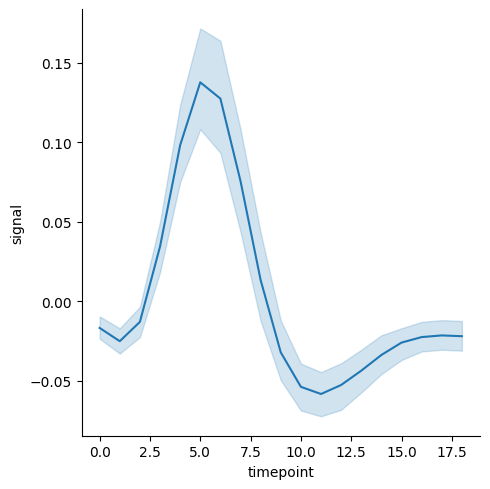

In [47]:
sns.relplot(data=fmri,x="timepoint",y="signal",kind="line")

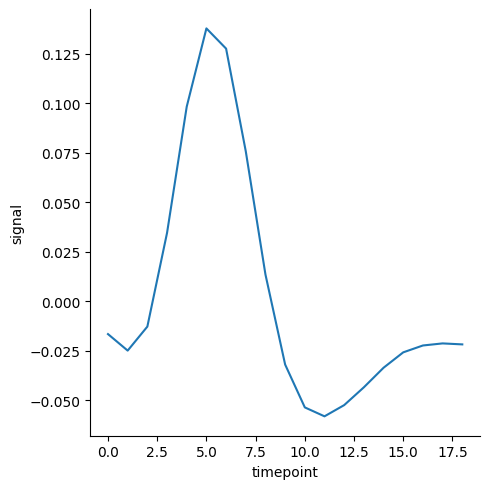

In [48]:
sns.relplot(data=fmri,kind="line",
            x="timepoint",y="signal",errorbar=None)
#errorbar =  either the range of uncertainty about the estimate or the spread of the underlying data around it

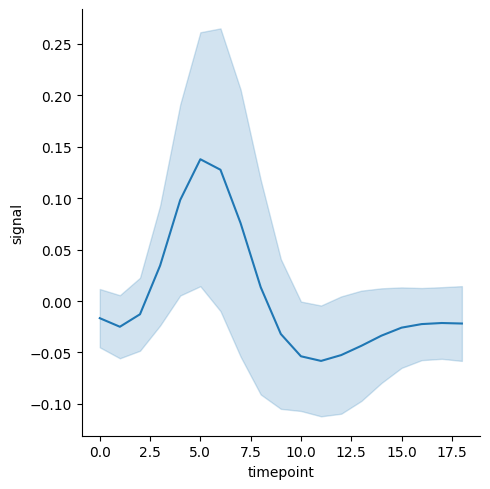

In [49]:
sns.relplot(data=fmri,kind="line",
            x="timepoint",y="signal",errorbar="sd")

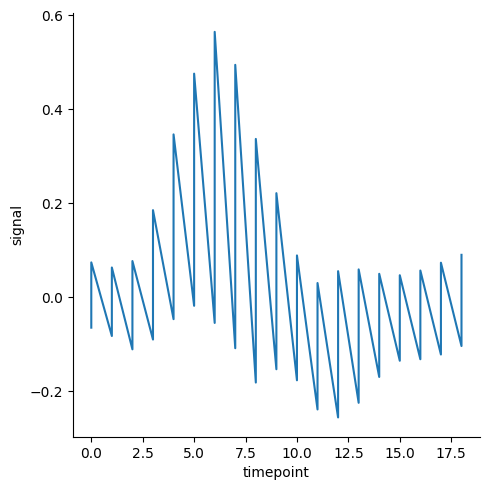

In [50]:
sns.relplot(data=fmri,kind="line",
            x="timepoint",y="signal",
            estimator=None)
#estimator = a method for statistical data aggregation, allowing for calculating mean, median,
#and standard deviation directly within visualizations.

Plotting subsets of data with semantic mapping

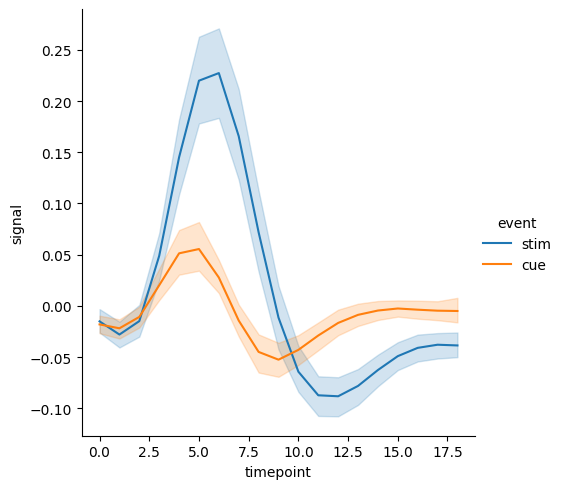

In [51]:
sns.relplot(data=fmri,kind="line",
            x="timepoint",y="signal",
            hue="event")

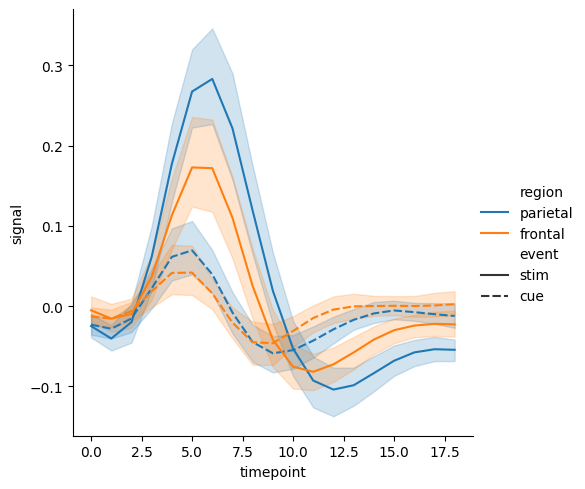

In [52]:
sns.relplot(data=fmri,kind="line",
            x="timepoint",y="signal",
            hue="region",style="event")

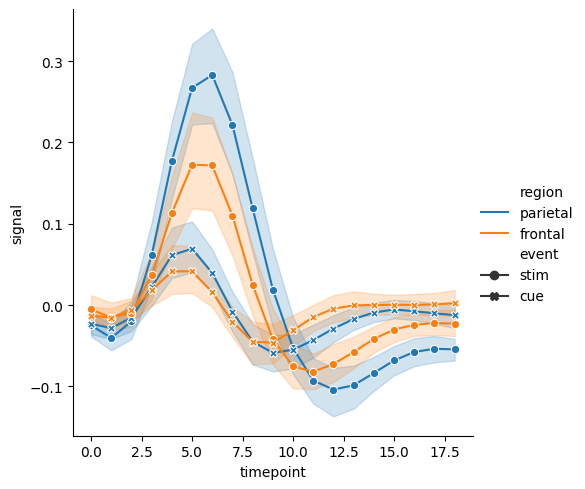

In [53]:
sns.relplot(data=fmri,kind="line",
            x="timepoint",y="signal",hue="region",style="event",
            dashes=False,markers=True)
# dashes: This parameter controls the line style.
# marker: This parameter controls the marker style.

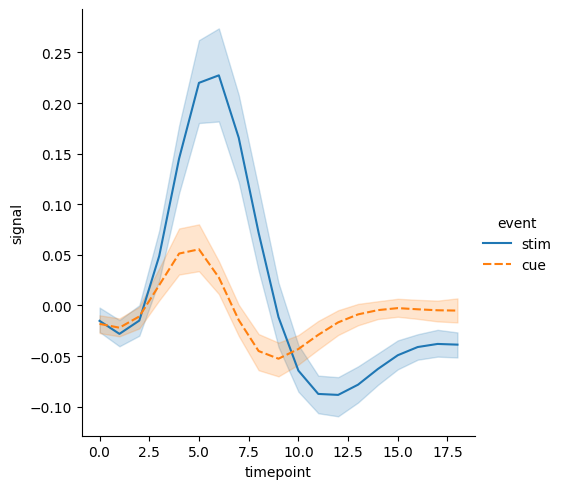

In [54]:
sns.relplot(data=fmri,kind="line",
            x="timepoint",y="signal",
            hue="event",style="event")

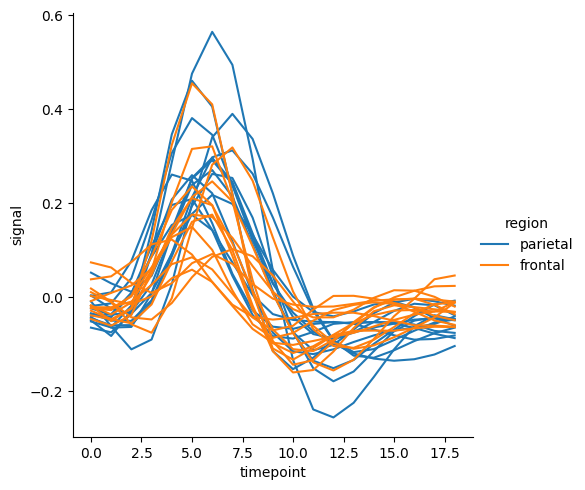

In [55]:
sns.relplot(
    data=fmri.query("event == 'stim'"),
    kind="line",
    x="timepoint", y="signal",hue="region",
    units="subject",estimator=None)

In [56]:
dots=sns.load_dataset('dots').query("align == 'dots'")
dots

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
389,dots,T2,680,3.2,37.806267
390,dots,T2,700,0.0,43.464959
391,dots,T2,700,3.2,38.994559
392,dots,T2,720,0.0,41.987121


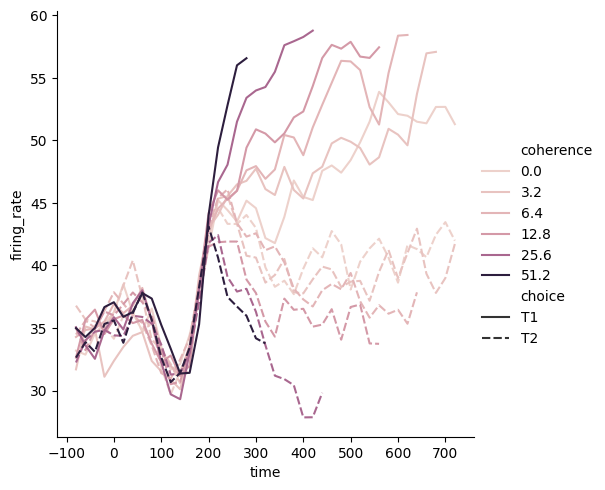

In [57]:
sns.relplot(data=dots,kind="line",
            x="time",y="firing_rate",
            hue="coherence",style="choice")

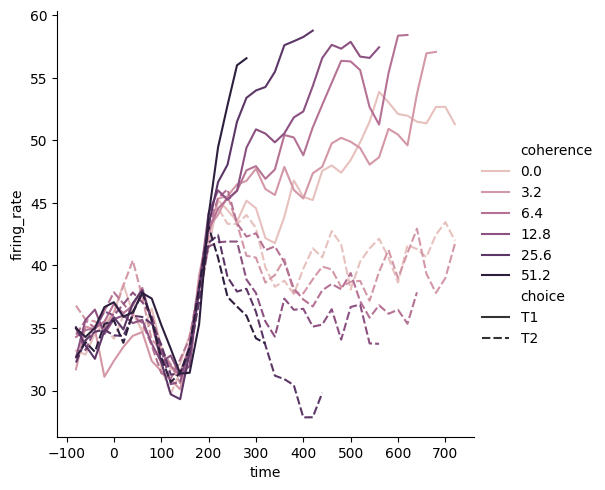

In [58]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice", palette=palette)

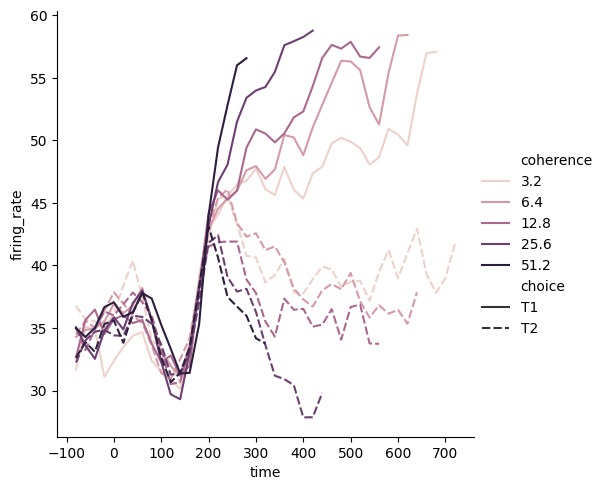

In [59]:
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(
    data=dots.query("coherence > 0"), kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice",
    hue_norm=LogNorm())

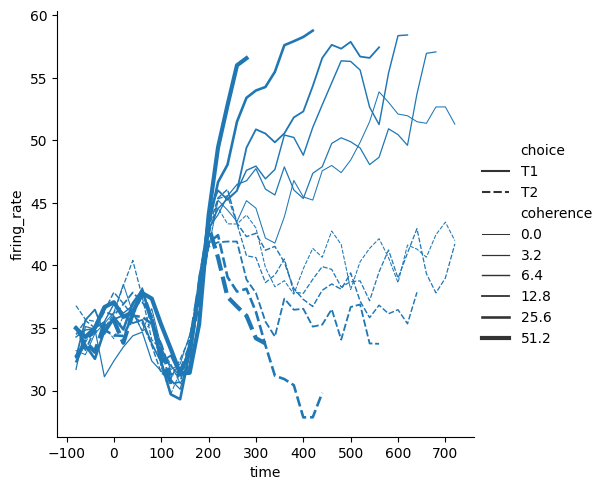

In [60]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    size="coherence", style="choice")

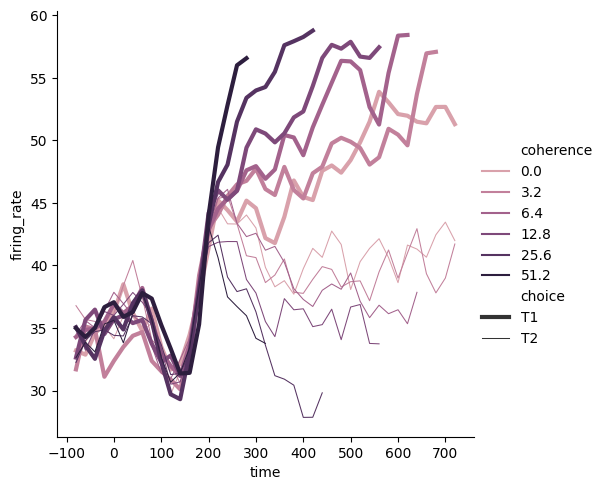

In [61]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", size="choice", palette=palette)

Controlling Sorting and Orientation

In [62]:
healthexp = sns.load_dataset("healthexp").sort_values("Year")
healthexp

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
268,2020,Canada,5828.324,81.7
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4


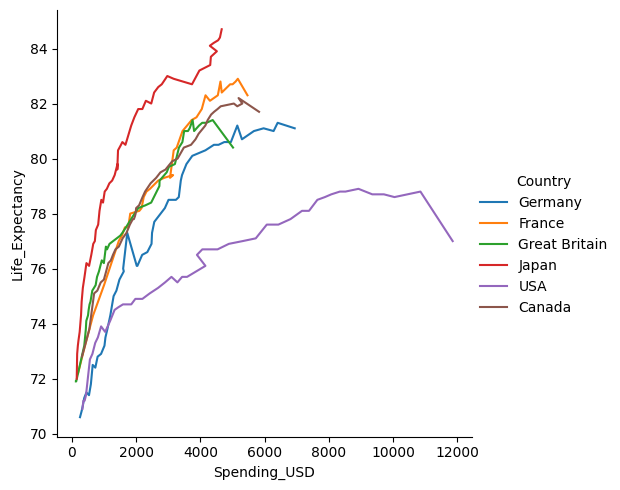

In [63]:
sns.relplot(
    data=healthexp, kind="line",
    x="Spending_USD", y="Life_Expectancy", hue="Country",
    sort=False)

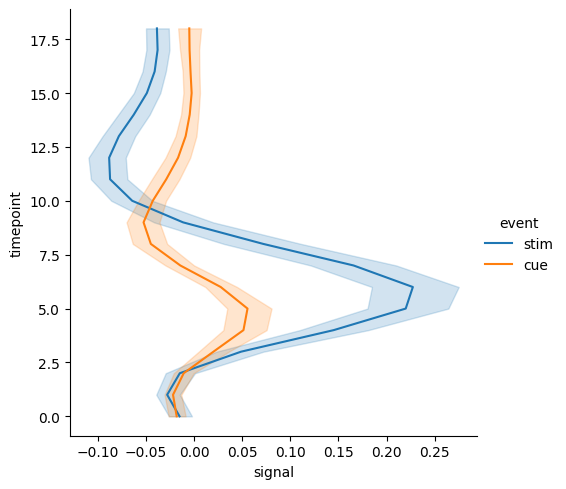

In [64]:
sns.relplot(
    data=fmri, kind="line",
     x="signal", y="timepoint", hue="event",
    orient="y")

Showing multiple relationship with facets

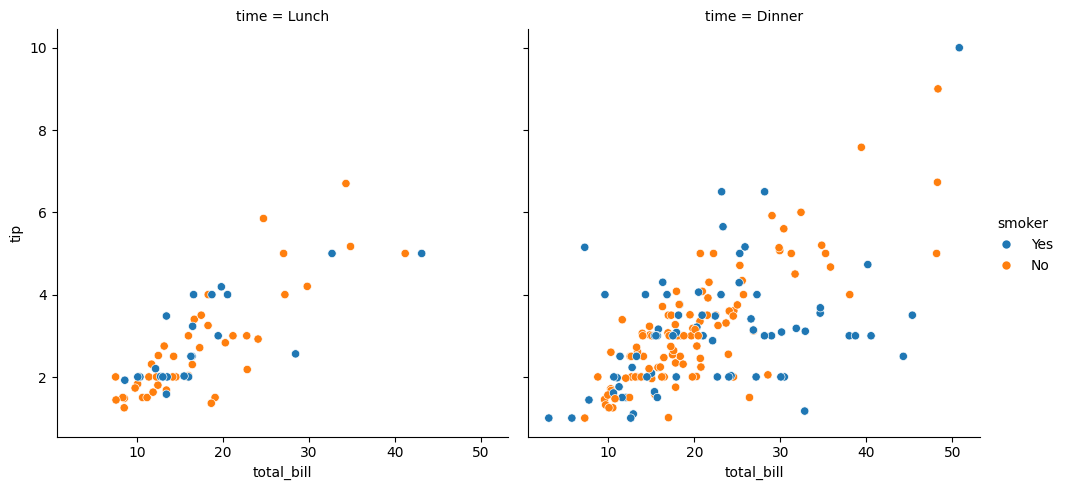

In [65]:
sns.relplot(data=tips,
            x="total_bill",y="tip",hue="smoker",col="time")

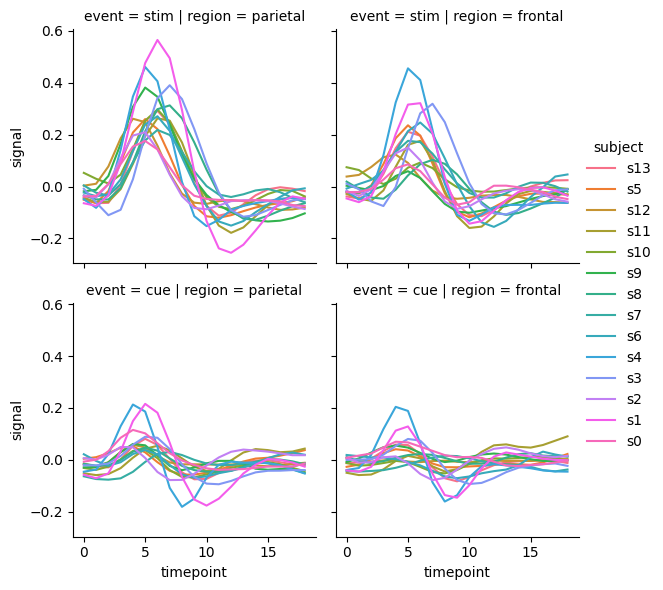

In [66]:
sns.relplot(data=fmri,kind="line",
            x="timepoint",y="signal",hue="subject",
            col="region",row="event",height=3,
            estimator=None)

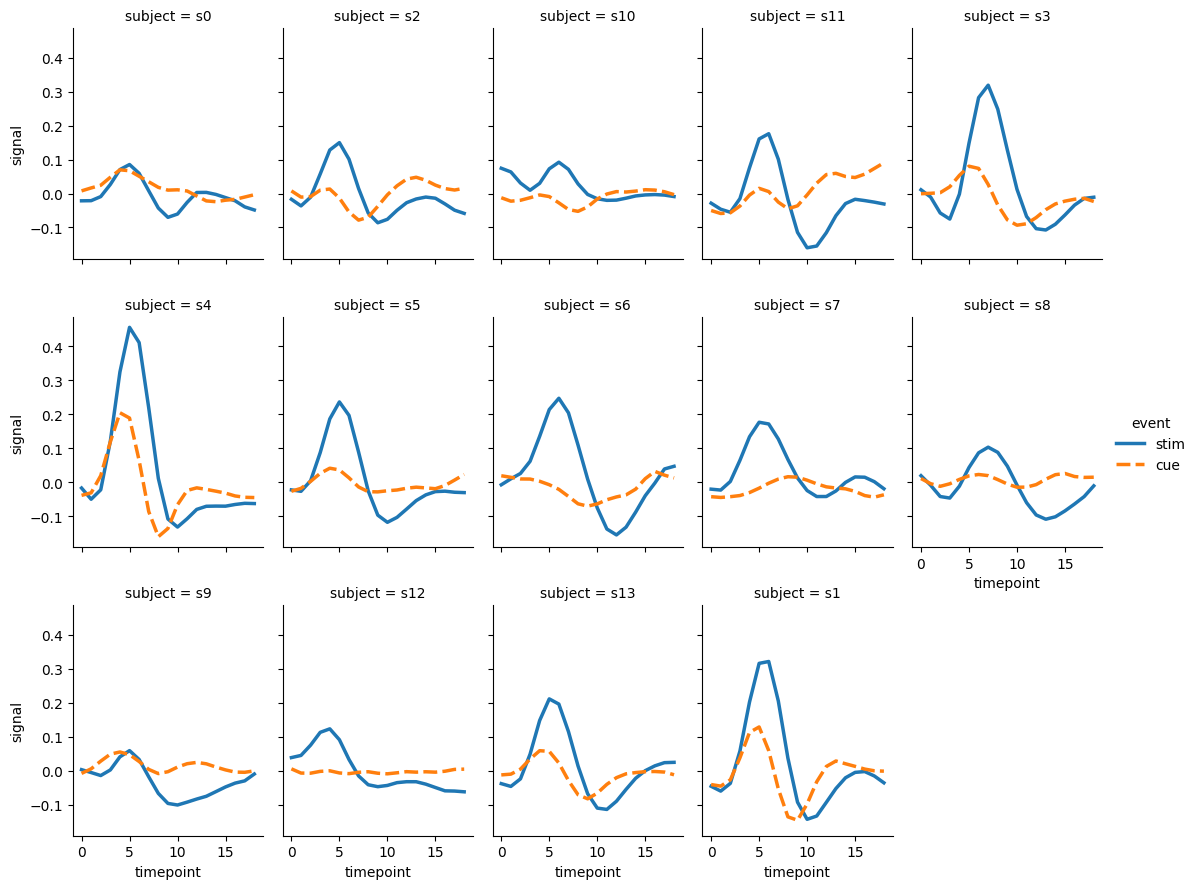

In [67]:
sns.relplot(data=fmri.query("region == 'frontal'"),kind="line",
            x="timepoint",y="signal",hue="event",style="event",
            col="subject",col_wrap=5,height=3,aspect=.75,linewidth=2.5)